# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.2'

In [22]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [23]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,186-11-118-B,103.588883,0.017247,1285.323486,0.014833,77.446246,1285.323486,169.830560,0.698016,1.400603,...,1.495238,0.511116,0.018026,1.219444,1.233202,0.280596,0.009061,PseudoVoigtModel,PseudoVoigtModel,No
1,186-11-118-C,103.589890,0.010386,1285.341147,0.009759,202.912067,1285.341147,519.250248,0.930710,2.499959,...,1.269006,0.543872,0.009174,1.193548,1.218324,0.259934,0.003096,PseudoVoigtModel,PseudoVoigtModel,No
2,186-11-119-C,103.759094,0.027632,1284.991647,0.025436,61.605665,1284.991647,197.800426,1.229099,1.444601,...,1.036496,0.276590,0.039902,1.125761,1.189970,0.220024,0.012929,PseudoVoigtModel,PseudoVoigtModel,No
3,186-11-120-B,103.857570,0.017470,1284.714244,0.016181,106.550127,1284.714244,307.094127,1.038287,1.956203,...,1.287088,0.573494,0.019489,1.038813,1.131488,0.057887,0.006478,PseudoVoigtModel,PseudoVoigtModel,No
4,186-11-120-C,103.745722,0.014317,1284.987935,0.013371,164.495231,1284.987935,430.519775,1.008682,2.448618,...,1.270156,0.567146,0.012264,1.042453,1.081560,0.060151,0.004009,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [24]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant','map','Series'],
 sort=True)
diad_meta[0]

'006 FG04-A1-4-start-50X-r1.txt'

## Now get all the important information out of the metadata files

In [25]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 95/95 [00:00<00:00, 439.51it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start-50X-r1.txt,"July 16, 2024\n",July,16.0,6.007,45.0,5.0,50.0,"['0h', '3m', '46s']",11:27:33 AM\n,41253.0,1324.767
1,FG04-A1-4-start-50X-r2.txt,"July 16, 2024\n",July,16.0,6.063,45.0,5.0,50.0,"['0h', '3m', '46s']",11:34:50 AM\n,41690.0,1324.767
2,FG04-A1-4-start-50X-r3.txt,"July 16, 2024\n",July,16.0,6.117,45.0,5.0,50.0,"['0h', '3m', '46s']",11:39:29 AM\n,41969.0,1324.767
3,FG04-A1-4-start-100X-r1.txt,"July 16, 2024\n",July,16.0,6.161,45.0,5.0,100.0,"['0h', '3m', '46s']",11:45:30 AM\n,42330.0,1324.767
4,FG04-A1-4-start-100X-r2.txt,"July 16, 2024\n",July,16.0,6.166,45.0,5.0,100.0,"['0h', '3m', '46s']",11:49:29 AM\n,42569.0,1324.767


## Then get a simple file name you can stitch with the spectra

In [26]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start-50X-r1'

In [27]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start-50X-r1', 'FG04-A1-4-start-50X-r2',
       'FG04-A1-4-start-50X-r3', 'FG04-A1-4-start-100X-r1',
       'FG04-A1-4-start-100X-r2', 'FG04-A1-4-start-100X-r3',
       'FG04-A1-1-start', 'FG04-A1-1-start-100X', 'FG04-A1-16-away',
       'FG04-A1-16-ol', '186-11-118-A', '186-11-118-B', '186-11-118-C',
       '186-11-119-A', '186-11-119-B', '186-11-119-C', '186-11-120-A',
       '186-11-120-B', '186-11-120-C', 'L11-m1-B', 'L11-m1-C', 'L11-m1-E',
       'L11-m1-F', 'L11-m2-E', 'L11-m2-F', 'L11-m2-G', 'L11-m4-A',
       'L11-m4-B', 'L11-m5-B', 'L11-m5-A', '187-9-101-A', '187-9-103-A',
       '187-9-103-B', '187-9-103-C', 'FG04-A1-4-end-r4'], dtype=object)

## Now get filename from spectra into same form as metadata

In [28]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
186-11-118-B


In [29]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['186-11-118-B', '186-11-118-C', '186-11-119-C', '186-11-120-B',
       '186-11-120-C', 'L11-m1-B', 'L11-m1-E', 'L11-m1-F', 'L11-m2-F',
       'L11-m4-A', 'L11-m5-B', '187-9-103-C', '186-11-118-A',
       '186-11-119-A', '186-11-119-B', '186-11-120-A', 'L11-m1-C',
       'L11-m2-E', 'L11-m2-G', 'L11-m4-B', 'L11-m5-A', '187-9-101-A',
       '187-9-103-A', '187-9-103-B', 'FG04-A1-4-start-50X-r1',
       'FG04-A1-4-start-50X-r2', 'FG04-A1-4-start-50X-r3',
       'FG04-A1-4-start-100X-r1', 'FG04-A1-4-start-100X-r2',
       'FG04-A1-4-start-100X-r3', 'FG04-A1-1-start',
       'FG04-A1-1-start-100X', 'FG04-A1-4-end-r4'], dtype='<U23')

In [30]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,186-11-118-B,103.588883,0.017247,1285.323486,0.014833,77.446246,1285.323486,169.830560,0.698016,1.400603,...,July,16.0,6.023,45.0,5.0,50.0,"['0h', '3m', '46s']",2:17:07 PM\n,51427.0,1324.964
1,186-11-118-C,103.589890,0.010386,1285.341147,0.009759,202.912067,1285.341147,519.250248,0.930710,2.499959,...,July,16.0,6.032,45.0,5.0,50.0,"['0h', '3m', '46s']",2:22:27 PM\n,51747.0,1324.964
2,186-11-119-C,103.759094,0.027632,1284.991647,0.025436,61.605665,1284.991647,197.800426,1.229099,1.444601,...,July,16.0,6.070,45.0,5.0,100.0,"['0h', '3m', '46s']",2:44:35 PM\n,53075.0,1324.964
3,186-11-120-B,103.857570,0.017470,1284.714244,0.016181,106.550127,1284.714244,307.094127,1.038287,1.956203,...,July,16.0,6.094,45.0,5.0,50.0,"['0h', '3m', '46s']",3:20:29 PM\n,55229.0,1324.964
4,186-11-120-C,103.745722,0.014317,1284.987935,0.013371,164.495231,1284.987935,430.519775,1.008682,2.448618,...,July,16.0,6.094,45.0,5.0,50.0,"['0h', '3m', '46s']",3:25:37 PM\n,55537.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [31]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [32]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [33]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

3.681358571175605e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,186-11-118-A,0.463457,0.004826,0.004214,0.002352,103.855561,0.009247,0.000372,0.009258,6.016,...,51151.0,NaN,NaN,NaN,NaN,NaN,51151.0,0.998015,0.998012,0.998019
1,186-11-118-B,0.257714,0.007565,0.007188,0.002357,103.382913,0.017216,0.000371,0.017247,6.023,...,51427.0,1094.819867,5750.921899,353.504235,Spline,13.035073,51427.0,0.998012,0.998008,0.998015
2,186-11-118-C,0.257949,0.004931,0.004331,0.002357,103.383476,0.010372,0.000370,0.010386,6.032,...,51747.0,1095.462469,618.043825,43.915339,Spline,0.469093,51747.0,0.998007,0.998004,0.998011
3,186-11-119-A,0.361264,0.005027,0.004445,0.002349,103.625981,0.010214,0.000371,0.010228,6.048,...,52325.0,NaN,NaN,NaN,NaN,NaN,52325.0,0.998000,0.997996,0.998003
4,186-11-119-B,0.298866,0.005600,0.005082,0.002352,103.480713,0.011983,0.000371,0.012001,6.061,...,52676.0,NaN,NaN,NaN,NaN,NaN,52676.0,0.997995,0.997992,0.997999


In [34]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

3.681358571175605e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,186-11-118-A,0.463457,0.004826,0.004214,0.002352,103.855561,0.009247,0.000372,0.009258,6.016,...,51151.0,NaN,NaN,NaN,NaN,NaN,51151.0,0.998015,0.998012,0.998019
1,186-11-118-B,0.257714,0.007565,0.007188,0.002357,103.382913,0.017216,0.000371,0.017247,6.023,...,51427.0,1094.819867,5750.921899,353.504235,Spline,13.035073,51427.0,0.998012,0.998008,0.998015
2,186-11-118-C,0.257949,0.004931,0.004331,0.002357,103.383476,0.010372,0.000370,0.010386,6.032,...,51747.0,1095.462469,618.043825,43.915339,Spline,0.469093,51747.0,0.998007,0.998004,0.998011
3,186-11-119-A,0.361264,0.005027,0.004445,0.002349,103.625981,0.010214,0.000371,0.010228,6.048,...,52325.0,NaN,NaN,NaN,NaN,NaN,52325.0,0.998000,0.997996,0.998003
4,186-11-119-B,0.298866,0.005600,0.005082,0.002352,103.480713,0.011983,0.000371,0.012001,6.061,...,52676.0,NaN,NaN,NaN,NaN,NaN,52676.0,0.997995,0.997992,0.997999


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [35]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_July 16, 2024_fitted_2024-07-17.xlsx


## This helps visualize the errors on each spectra 

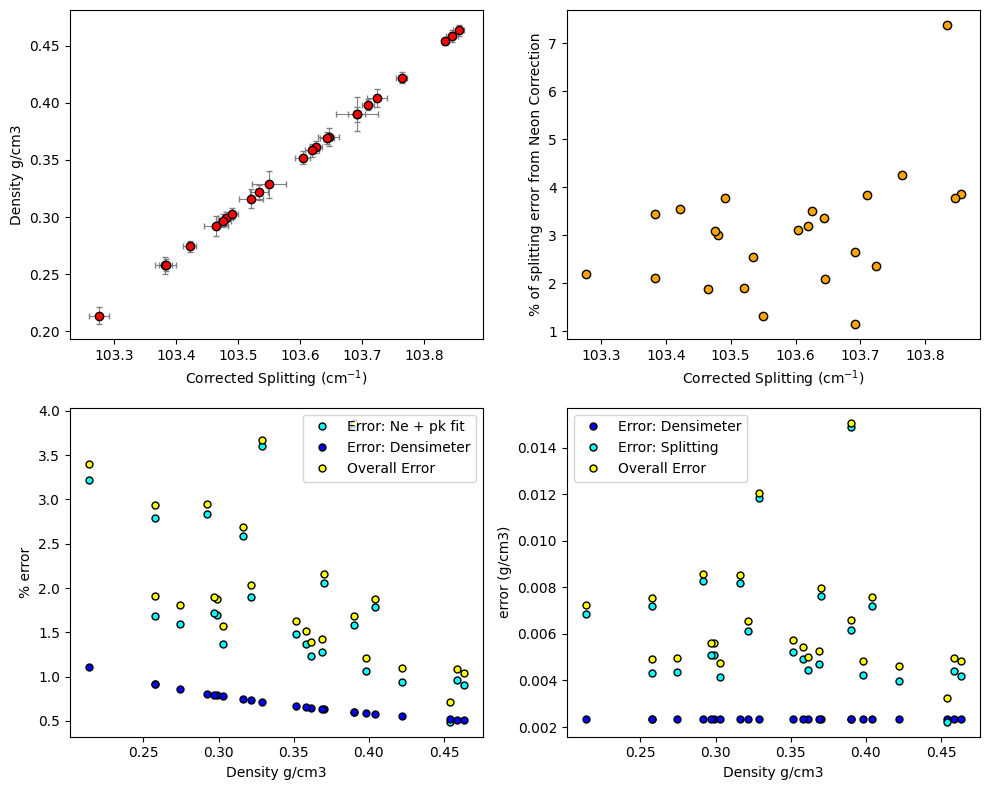

In [36]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

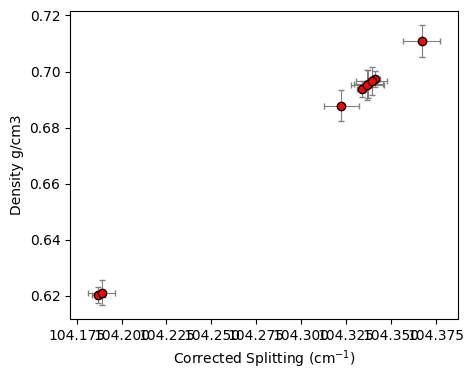

In [37]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [18]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

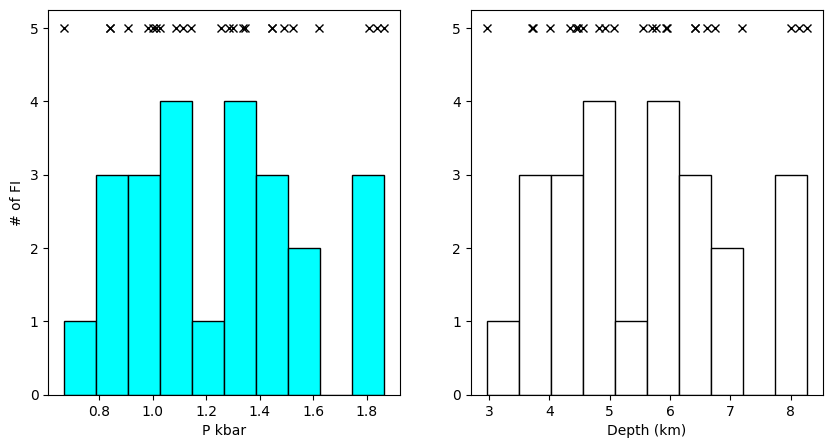

In [38]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [39]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step4 Stitch outputs is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()